## Histogram equalization only to the foreground of an image

**(a) split it into hue, saturation, and values and display these planes in grayscale**

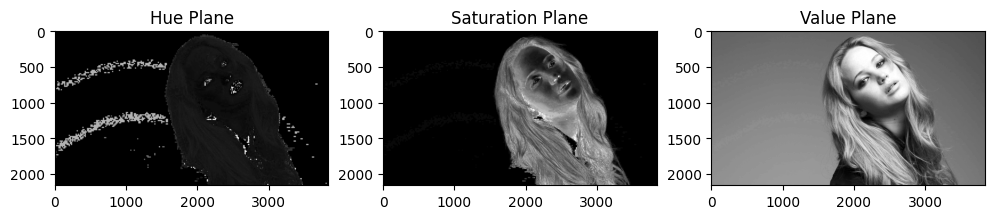

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load image
image_path = r'C:\Users\Asus\Documents\GitHub\EN3160-Image-Processing-and-Machine-Vision-Lab-Experiments\assignment_1\a1images\jeniffer.jpg'
image = cv2.imread(image_path)
assert image is not None, "Image not found."

# Convert the image from BGR to HSV
hsv_converted_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value channels
hue_channel, saturation_channel, value_channel = cv2.split(hsv_converted_image)

# Display the hue, saturation, and value planes in grayscale
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(hue_channel, cmap='gray')
plt.title('Hue Plane')

plt.subplot(1, 3, 2)
plt.imshow(saturation_channel, cmap='gray')
plt.title('Saturation Plane')

plt.subplot(1, 3, 3)
plt.imshow(value_channel, cmap='gray')
plt.title('Value Plane')

plt.show()

**(b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.**

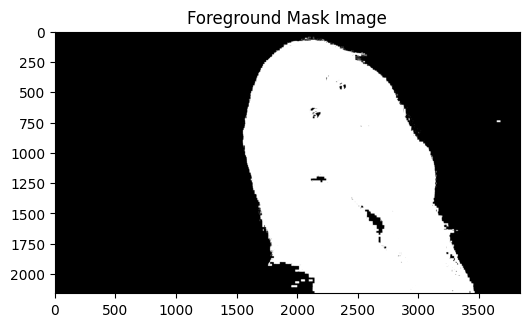

In [51]:
# Threshold the image to create the mask
# getting threshold value(12) for saturation channel
_, mask = cv2.threshold(saturation_channel, 12, 255, cv2.THRESH_BINARY)

# Display the mask
plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask Image')
plt.show()

**(c) Obtain the foreground only using cv.bitwise_and and compute the histogram**

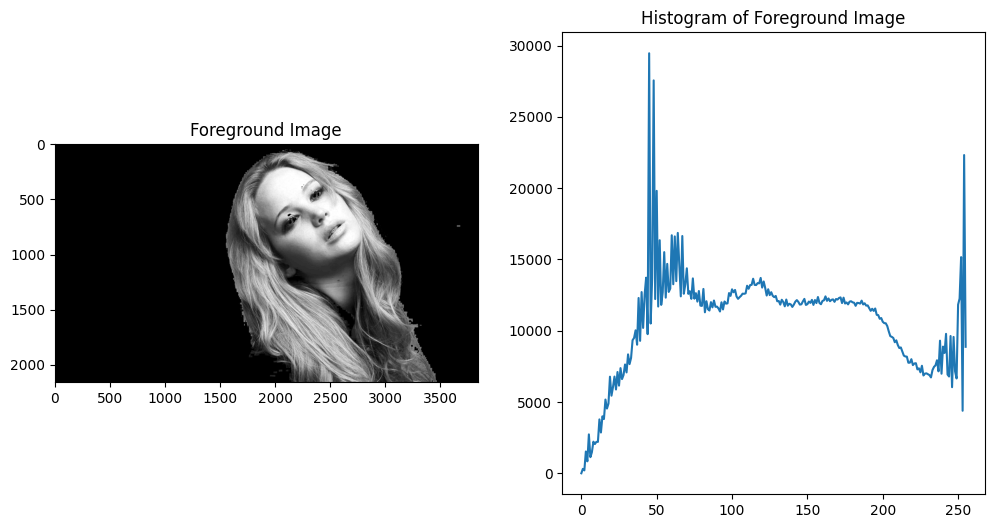

In [52]:
# Obtain the foreground only using cv.bitwise_and and compute the histogram
foreground = cv2.bitwise_and(value_channel, value_channel, mask=mask)

# Compute the histogram of the foreground image
histogram = cv2.calcHist([foreground], [0], mask, [256], [0, 256])

# Display the foreground image and its histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(foreground, cmap='gray')
plt.title('Foreground Image')

plt.subplot(1, 2, 2)
plt.plot(histogram)
plt.title('Histogram of Foreground Image')

plt.show()

**(d) Obtain the Cumulative Sum of the Histogram using np.cumsum**

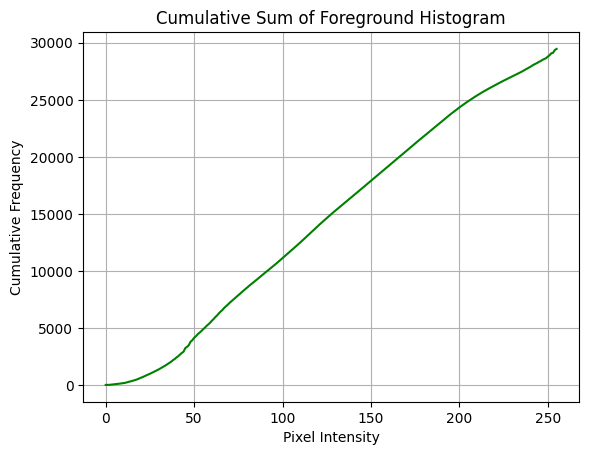

In [53]:
# Calculate the cumulative sum of the foreground histogram
cdf_foreground = np.cumsum(histogram)

# Normalize the cumulative sum
cdf_normalized = cdf_foreground * histogram.max() / cdf_foreground.max()

# Plot the cumulative distribution function (CDF) with a different style
plt.plot(cdf_normalized, color='g', linestyle='-')
plt.title('Cumulative Sum of Foreground Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()

**(e) Histogram-equalize the foreground.**

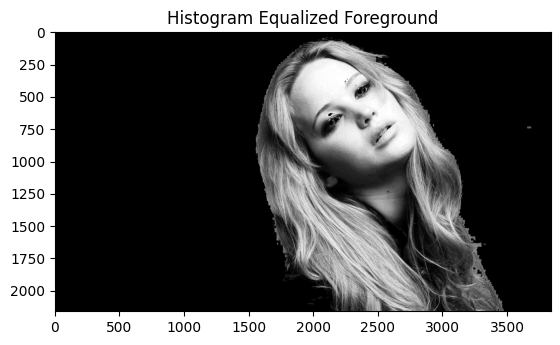

In [54]:
# Mask all zeros to avoid division by zero
cdf_masked = np.ma.masked_equal(cdf_foreground, 0)

# Perform histogram equalization: scale the values and fill masked zeros
cdf_masked = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
cdf_equalized = np.ma.filled(cdf_masked, 0).astype('uint8')

# Apply the equalized CDF to the foreground image
equalized_image = cdf_equalized[foreground]

# Show the histogram-equalized foreground
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Foreground')
plt.show()

**(f) Extract the background and add with the histogram equalized foreground.**

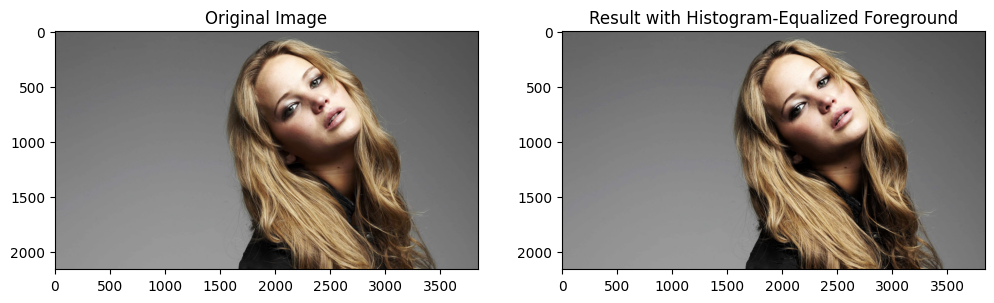

In [49]:
# Invert the mask to obtain the background
background_mask = cv2.bitwise_not(mask)

# Extract the background using the inverted mask
background = cv2.bitwise_and(value_channel, value_channel, mask=background_mask)

# Combine the background with the equalized foreground
final_value_plane = cv2.add(background, equalized_image)

# Replace the value plane in the HSV image with the combined image
hsv_converted_image[:, :, 2] = final_value_plane

# Convert the HSV image back to BGR format for display
result_image = cv2.cvtColor(hsv_converted_image, cv2.COLOR_HSV2BGR)

# Display the original image and the result with histogram-equalized foreground
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Result with Histogram-Equalized Foreground')

plt.show()